# Process
We will follow the same process as in the R demo
* load data
* check that it's clean (no missing values, etc)
* maybe a little EDA if you haven't already
* 

If you don't have a package installed, try `conda install package` in a terminal or command console, or do `pip install package`.  pip is usually more up-to-date than conda, FYI, so I almost always use that.

In [1]:
# installed
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# will show plots without doing plt.show()
%matplotlib inline

In [2]:
fn = '/home/nate/Dropbox/MSDS/MSDS680_ncg_S8W1_18/week1/auto.dt.nona.csv'
df = pd.read_csv(fn)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model.year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.127154,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.315134,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


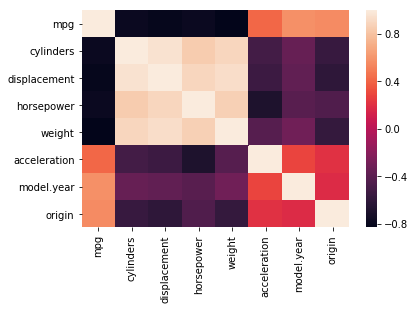

In [6]:
# the _ = just hides the text output from the command
_ = sns.heatmap(df.corr())

In [7]:
cols = df.columns
target_col = 'mpg'
feat_cols = [c for c in cols if c != target_col]
X = df[feat_cols].values
y = df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scores = []
for k in range(2, 21):
    print(k)
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


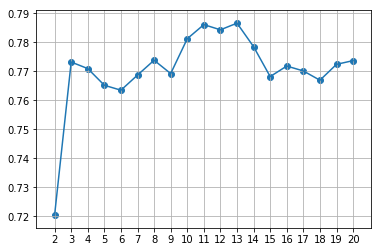

In [9]:
_ = plt.plot(range(2, 21), scores)
_ = plt.scatter(range(2, 21), scores)
_ = plt.grid()
_ = plt.xticks(range(2, 21))

Looks like around 11 is the best number according to the plot above.

In [10]:
model = KNeighborsRegressor(n_neighbors=11, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
diffs = y_test - preds

# it's pretty different from the R result -- possibly knn.reg is using a different distance or weighting approach, I'm not sure.

In [11]:
pc = PCA()
tr_pca = pc.fit_transform(X_train)
te_pca = pc.transform(X_test)

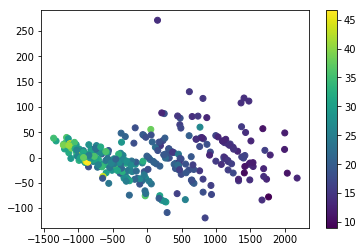

In [12]:
# indexing of a matrix in Python (numpy) is [rows, cols]
_ = plt.scatter(tr_pca[:, 0], tr_pca[:, 1], c=y_train)
_ = plt.colorbar()

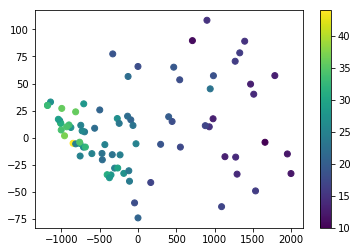

In [13]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=y_test)
_ = plt.colorbar()

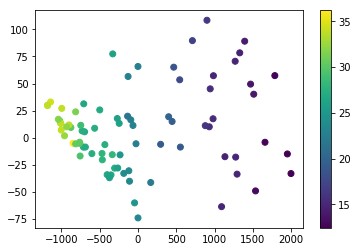

In [14]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=preds)
_ = plt.colorbar()

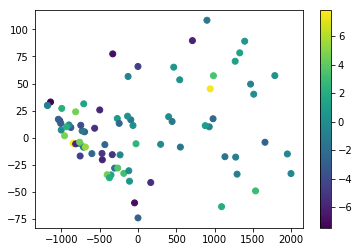

In [15]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=diffs)
_ = plt.colorbar()